DATASET SPOTIFY(EJERCICIO CRISTIAN JAVIER RUIZ RUIZ)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Ajustes visuales
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 6)


In [2]:
# Cargar el dataset
from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv("/content/drive/MyDrive/DATASETS/spotify /SpotifyFeatures.csv")
# Mostrar las primeras filas
display(df.head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,genre,artist_name,track_name,track_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,Movie,Henri Salvador,C'est beau de faire un Show,0BRjO6ga9RKCKjfDqeFgWV,0,0.611,0.389,99373,0.910,0.000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,Movie,Martin & les fées,Perdu d'avance (par Gad Elmaleh),0BjC1NfoEOOusryehmNudP,1,0.246,0.590,137373,0.737,0.000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,Movie,Joseph Williams,Don't Let Me Be Lonely Tonight,0CoSDzoNIKCRs124s9uTVy,3,0.952,0.663,170267,0.131,0.000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,Movie,Henri Salvador,Dis-moi Monsieur Gordon Cooper,0Gc6TVm52BwZD07Ki6tIvf,0,0.703,0.240,152427,0.326,0.000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,Movie,Fabien Nataf,Ouverture,0IuslXpMROHdEPvSl1fTQK,4,0.950,0.331,82625,0.225,0.123,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390


In [3]:
# Ver tipos de datos
df.info()

# Seleccionar columnas numéricas útiles para clustering
numeric_cols = [
    'acousticness', 'danceability', 'duration_ms', 'energy',
    'instrumentalness', 'liveness', 'loudness', 'speechiness',
    'tempo', 'valence', 'popularity'
]
df_numeric = df[numeric_cols]
df_numeric.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232725 entries, 0 to 232724
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   genre             232725 non-null  object 
 1   artist_name       232725 non-null  object 
 2   track_name        232724 non-null  object 
 3   track_id          232725 non-null  object 
 4   popularity        232725 non-null  int64  
 5   acousticness      232725 non-null  float64
 6   danceability      232725 non-null  float64
 7   duration_ms       232725 non-null  int64  
 8   energy            232725 non-null  float64
 9   instrumentalness  232725 non-null  float64
 10  key               232725 non-null  object 
 11  liveness          232725 non-null  float64
 12  loudness          232725 non-null  float64
 13  mode              232725 non-null  object 
 14  speechiness       232725 non-null  float64
 15  tempo             232725 non-null  float64
 16  time_signature    23

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
count,232725.000000,232725.000000,2.327250e+05,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000,232725.000000
mean,0.368560,0.554364,2.351223e+05,0.570958,0.148301,0.215009,-9.569885,0.120765,117.666585,0.454917,41.127502
std,0.354768,0.185608,1.189359e+05,0.263456,0.302768,0.198273,5.998204,0.185518,30.898907,0.260065,18.189948
min,0.000000,0.056900,1.538700e+04,0.000020,0.000000,0.009670,-52.457000,0.022200,30.379000,0.000000,0.000000
25%,0.037600,0.435000,1.828570e+05,0.385000,0.000000,0.097400,-11.771000,0.036700,92.959000,0.237000,29.000000
50%,0.232000,0.571000,2.204270e+05,0.605000,0.000044,0.128000,-7.762000,0.050100,115.778000,0.444000,43.000000
75%,0.722000,0.692000,2.657680e+05,0.787000,0.035800,0.264000,-5.501000,0.105000,139.054000,0.660000,55.000000
max,0.996000,0.989000,5.552917e+06,0.999000,0.999000,1.000000,3.744000,0.967000,242.903000,1.000000,100.000000


In [4]:
# Normalización de datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_numeric)


Varianza explicada: [0.3282235  0.15545747]


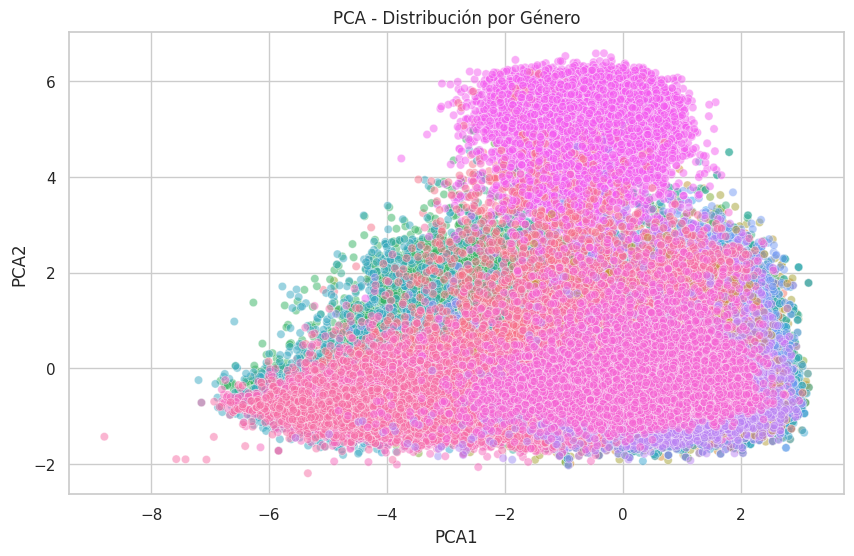

In [5]:
# Aplicar PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_data)

# Visualizar la varianza explicada
print(f"Varianza explicada: {pca.explained_variance_ratio_}")

# Crear DataFrame para visualización
pca_df = pd.DataFrame(pca_result, columns=["PCA1", "PCA2"])
pca_df["genre"] = df["genre"]

# Graficar
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="genre", legend=False, alpha=0.5)
plt.title("PCA - Distribución por Género")
plt.show()


/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


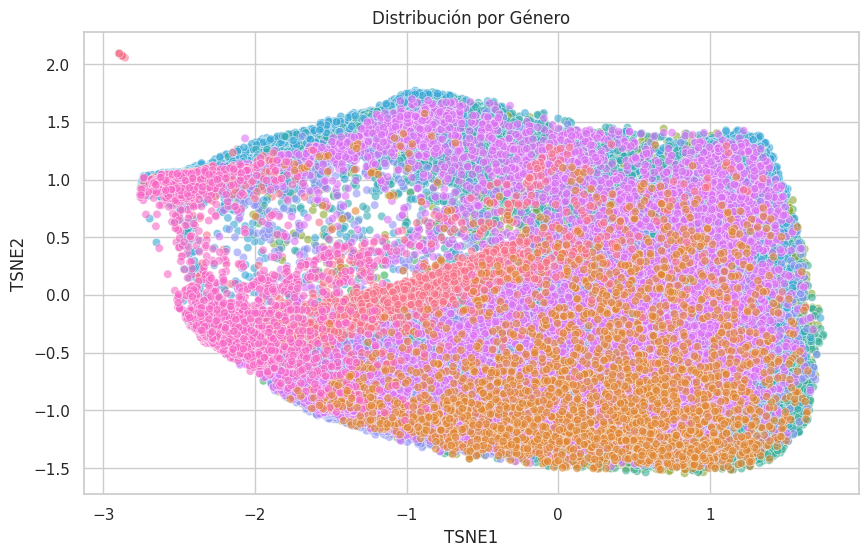

In [15]:
# 🔹 MUESTRA REDUCIDA PARA PRUEBA RÁPIDA
sample_size = 60000
sample_data = scaled_data[:sample_size]
sample_genre = df["genre"][:sample_size]

# 🔹 Parámetros reducidos
tsne = TSNE(n_components=2, random_state=42, perplexity=15, n_iter=250)
tsne_result = tsne.fit_transform(sample_data)

# 🔹 Graficar
tsne_df = pd.DataFrame(tsne_result, columns=["TSNE1", "TSNE2"])
tsne_df["genre"] = sample_genre.values
sns.scatterplot(data=tsne_df, x="TSNE1", y="TSNE2", hue="genre", legend=False, alpha=0.6)
plt.title("Distribución por Género")
plt.show()


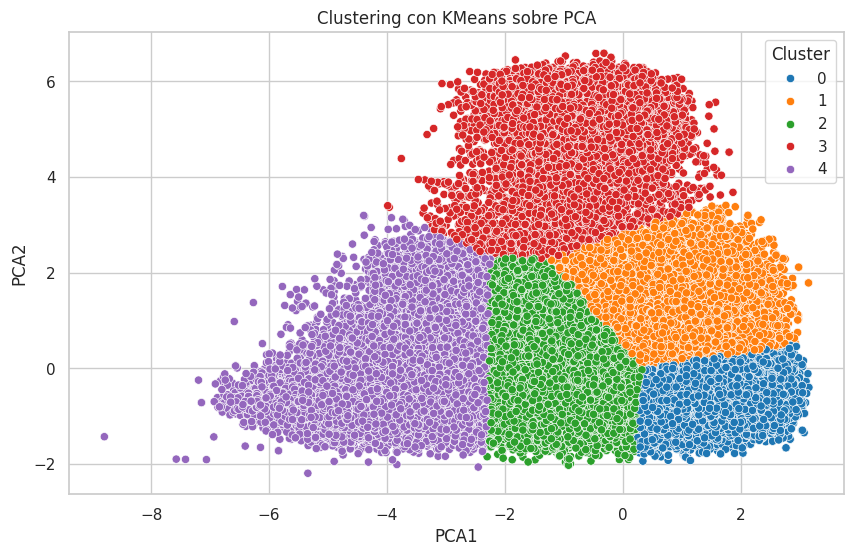

In [7]:
# Elegir número de clusters
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Agregar a DataFrame
pca_df["Cluster"] = clusters

# Visualizar clusters
sns.scatterplot(data=pca_df, x="PCA1", y="PCA2", hue="Cluster", palette="tab10")
plt.title("Clustering con KMeans sobre PCA")
plt.show()


In [8]:
# Calcular Silhouette Score
score = silhouette_score(pca_result, clusters)
print(f"Silhouette Score: {score:.4f}")

# Analizar características promedio por cluster
df_clustered = df.copy()
df_clustered["Cluster"] = clusters
mean_features = df_clustered.groupby("Cluster")[numeric_cols].mean()
mean_features



Silhouette Score: 0.4151


,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
Cluster,,,,,,,,,,,
0,0.120259,0.625566,227744.895043,0.729943,0.042181,0.147465,-6.069655,0.079765,126.475586,0.557969,50.178559
1,0.216987,0.629444,223933.817433,0.721001,0.026631,0.382805,-6.701827,0.180129,117.198273,0.584587,38.457300
2,0.516046,0.532202,242442.841940,0.429283,0.191700,0.157423,-10.603606,0.059147,115.790582,0.371331,40.053735
3,0.799636,0.557562,237640.440460,0.651464,0.002408,0.736739,-12.152648,0.853408,97.821908,0.413334,19.997294
4,0.891021,0.292917,256432.201998,0.144266,0.576206,0.159865,-20.706085,0.048975,101.398140,0.157088,25.654252


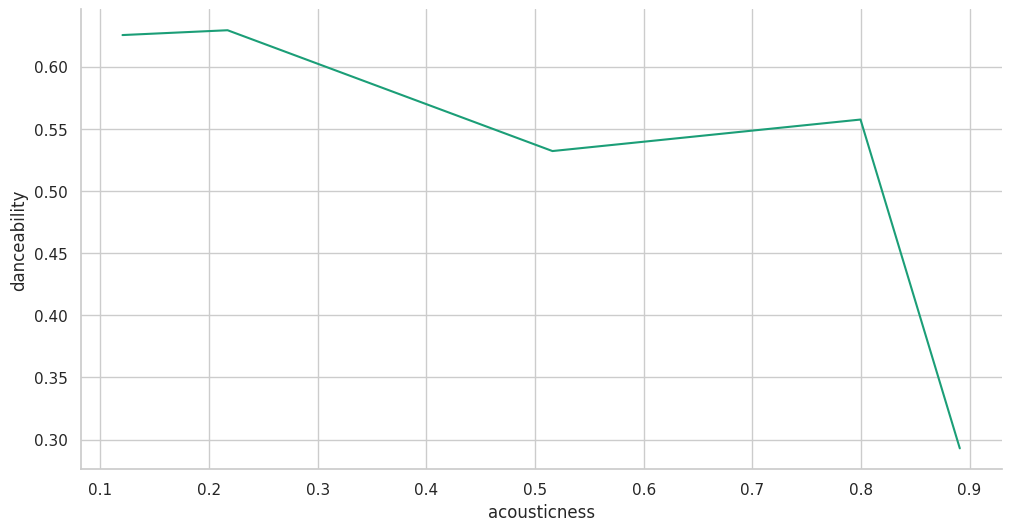

In [16]:
# @title acousticness vs danceability

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['acousticness']
  ys = series['danceability']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = mean_features.sort_values('acousticness', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('acousticness')
_ = plt.ylabel('danceability')

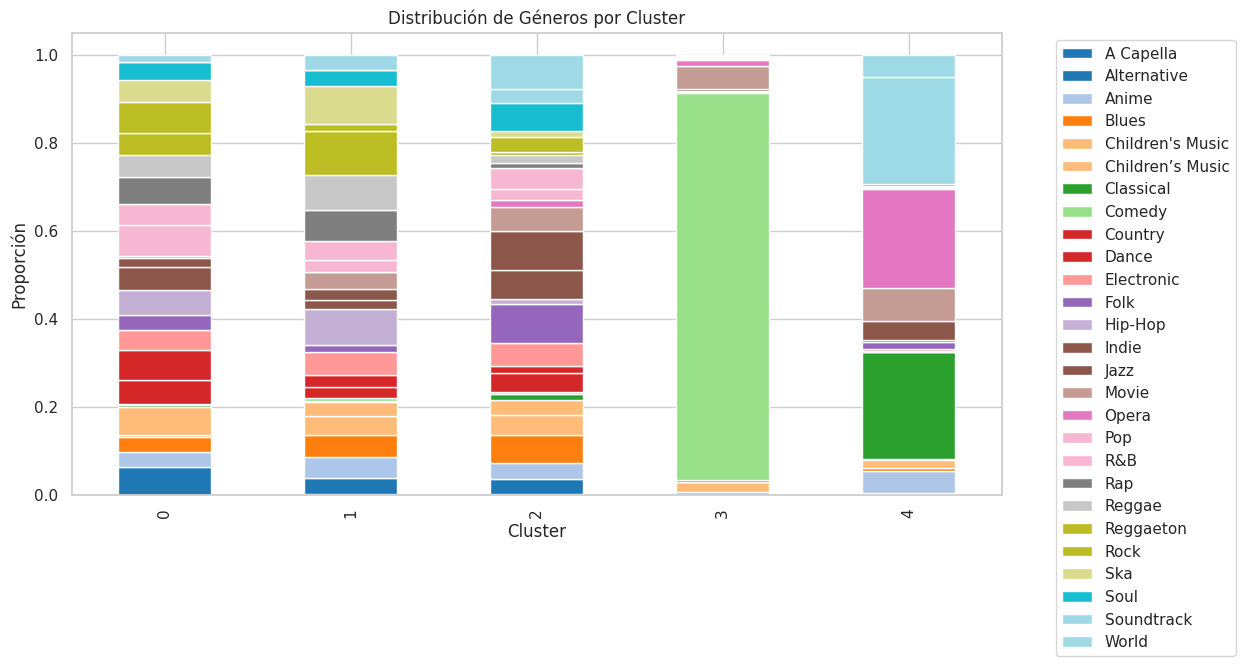

In [9]:
# ¿Qué género predomina por cluster?
genre_counts = df_clustered.groupby("Cluster")["genre"].value_counts().unstack().fillna(0)
genre_counts = genre_counts.div(genre_counts.sum(axis=1), axis=0)  # proporciones
genre_counts.plot(kind="bar", stacked=True, colormap="tab20", figsize=(12,6))
plt.title("Distribución de Géneros por Cluster")
plt.ylabel("Proporción")
plt.xlabel("Cluster")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.show()
